In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from FCMs import transferFunc, reverseFunc
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler

In [2]:
from Wavelet_HFCM import splitData, create_dataset, predict, normalize, re_normalize, wavelet_transform, wavelet_reconstruct, HFCM_ridge, analyze_paras_HFCM, HaarWaveletTransform, statistics

In [3]:
apple = pd.read_csv('/Users/andyliu/develop/andy/data_processing/SPY_indicators.csv')

In [6]:
apple.head()

,Unnamed: 0,Date,open,high,low,close,Adj Close,Volume,bb_bbm,bb_bbh,...,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,25,2015-09-28,191.779999,191.910004,187.639999,188.009995,171.096954,178515900,195.2680,200.883601,...,4.172916,-1.178742,-192.854078,194.285195,-4.003069,195.358334,192.254001,2.426203,-3.806601,-4.003069
1,26,2015-09-29,188.270004,189.740005,186.929993,188.119995,171.197083,159045600,194.7905,201.090328,...,4.075566,-1.561348,-182.945293,193.463168,-4.381422,194.640000,191.095999,7.456150,-4.245145,-4.381422
2,27,2015-09-30,190.369995,191.830002,189.440002,191.630005,174.391342,163452000,194.7835,201.097033,...,4.049454,-1.563317,-102.935516,193.218746,-2.234575,194.275000,190.701999,29.448686,-1.175803,-2.234575
3,28,2015-10-01,192.080002,192.490005,189.820007,192.130005,174.846375,131079000,194.6195,201.029088,...,3.950922,-1.507157,-80.082798,193.073581,-3.189561,193.747500,190.548001,32.581517,-0.759298,-3.189561
4,29,2015-10-02,189.770004,195.029999,189.119995,195.000000,177.458160,211003300,194.5920,200.990092,...,4.090856,-1.217037,-36.705309,193.330437,-2.587668,193.315834,190.978000,50.563935,1.088650,-2.587668


In [7]:
apple = apple[['open', 'high', 'low', 'close', 'Adj Close', 'Volume']]

In [8]:
len(apple)

1234

In [9]:
df = np.array(apple.iloc[:,3])

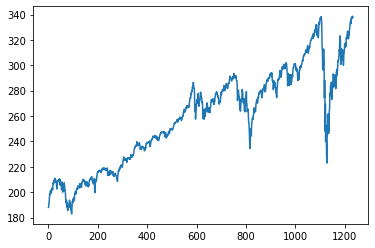

In [10]:
plt.plot(df)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
scaled = scaler.fit_transform(np.array(df).reshape(-1,1))[:,0]

In [18]:
length = len(scaled)
len_train_data = int(length * 0.9)

In [19]:
len_validation_data = int(len_train_data * 0.2)
len_test_data = length - len_train_data

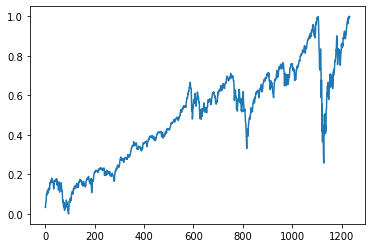

In [20]:
plt.plot(scaled)

In [21]:
import time
start = time.time()

Nc -> 2, Order -> 2, alpha -> 1e-15: rmse -> 0.067274  | min_rmse is inf, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.00526316: rmse -> 0.067302  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0105263: rmse -> 0.067338  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0157895: rmse -> 0.067374  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0210526: rmse -> 0.067411  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0263158: rmse -> 0.067447  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0315789: rmse -> 0.067483  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0368421: rmse -> 0.067519  | min_rmse is 0.067274, min_rmse_inall is inf (-1, -1)
Nc -> 2, Order -> 2, alpha -> 0.0421053: rmse -> 0.067555  | min_rmse is 0.067274, min_rmse_inal

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47623e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47623e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47623e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47623e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.47623e-18): result may not be accurate.
  overwrite_a=True).T


Nc -> 5, Order -> 2, alpha -> 1e-15: rmse -> 0.058890  | min_rmse is inf, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.00526316: rmse -> 0.063621  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0105263: rmse -> 0.065320  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0157895: rmse -> 0.066474  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0210526: rmse -> 0.076542  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0263158: rmse -> 0.093818  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0315789: rmse -> 0.108792  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0368421: rmse -> 0.121236  | min_rmse is 0.058890, min_rmse_inall is 0.065881 (4, 2)
Nc -> 5, Order -> 2, alpha -> 0.0421053: rmse -> 0.131585  | min_rmse is

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22859e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22859e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22859e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22859e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22859e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 7, Order -> 2, alpha -> 1e-15: rmse -> 0.038207  | min_rmse is inf, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.00526316: rmse -> 0.048839  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0105263: rmse -> 0.067046  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0157895: rmse -> 0.116058  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0210526: rmse -> 0.147261  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0263158: rmse -> 0.168016  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0315789: rmse -> 0.182773  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0368421: rmse -> 0.193814  | min_rmse is 0.038207, min_rmse_inall is 0.052775 (6, 2)
Nc -> 7, Order -> 2, alpha -> 0.0421053: rmse -> 0.202400  | min_rmse is

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-17): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 8, Order -> 2, alpha -> 1e-15: rmse -> 0.036760  | min_rmse is inf, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.00526316: rmse -> 0.058209  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0105263: rmse -> 0.137053  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0157895: rmse -> 0.180063  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0210526: rmse -> 0.203883  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0263158: rmse -> 0.219074  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0315789: rmse -> 0.229665  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0368421: rmse -> 0.237513  | min_rmse is 0.036760, min_rmse_inall is 0.038207 (7, 2)
Nc -> 8, Order -> 2, alpha -> 0.0421053: rmse -> 0.243593  | min_rmse is

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34134e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34134e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34134e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34134e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.34134e-18): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 9, Order -> 2, alpha -> 1e-15: rmse -> 0.048926  | min_rmse is inf, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.00526316: rmse -> 0.162037  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0105263: rmse -> 0.222014  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0157895: rmse -> 0.244946  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0210526: rmse -> 0.257422  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0263158: rmse -> 0.265449  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0315789: rmse -> 0.271158  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0368421: rmse -> 0.275502  | min_rmse is 0.048926, min_rmse_inall is 0.036760 (8, 2)
Nc -> 9, Order -> 2, alpha -> 0.0421053: rmse -> 0.278972  | min_rmse is

Nc -> 3, Order -> 3, alpha -> 0.0578947: rmse -> 0.120657  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0631579: rmse -> 0.121692  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0684211: rmse -> 0.122759  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0736842: rmse -> 0.123849  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0789474: rmse -> 0.124956  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0842105: rmse -> 0.126074  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0894737: rmse -> 0.127199  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.0947368: rmse -> 0.128328  | min_rmse is 0.116295, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 3, alpha -> 0.1: rmse -> 0.129459  | m

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32999e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32999e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32999e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32999e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32999e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 7, Order -> 3, alpha -> 1e-15: rmse -> 0.037568  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.00526316: rmse -> 0.057616  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0105263: rmse -> 0.071749  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0157895: rmse -> 0.135859  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0210526: rmse -> 0.181329  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0263158: rmse -> 0.213708  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0315789: rmse -> 0.237839  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0368421: rmse -> 0.256514  | min_rmse is 0.037568, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 3, alpha -> 0.0421053: rmse -> 0.271404  | min

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.14752e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.14752e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.14752e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.14752e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.14752e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 9, Order -> 3, alpha -> 1e-15: rmse -> 0.050145  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.00526316: rmse -> 0.197557  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0105263: rmse -> 0.294130  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0157895: rmse -> 0.332891  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0210526: rmse -> 0.354273  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0263158: rmse -> 0.368004  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0315789: rmse -> 0.377657  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0368421: rmse -> 0.384870  | min_rmse is 0.050145, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 3, alpha -> 0.0421053: rmse -> 0.390498  | min

Nc -> 3, Order -> 4, alpha -> 0.0526316: rmse -> 0.118886  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0578947: rmse -> 0.120262  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0631579: rmse -> 0.121621  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0684211: rmse -> 0.122963  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0736842: rmse -> 0.124289  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0789474: rmse -> 0.125600  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0842105: rmse -> 0.126896  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0894737: rmse -> 0.128177  | min_rmse is 0.066499, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 4, alpha -> 0.0947368: rmse -> 0.12944

Nc -> 7, Order -> 4, alpha -> 1e-15: rmse -> 0.040349  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.00526316: rmse -> 0.069330  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0105263: rmse -> 0.094076  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0157895: rmse -> 0.155671  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0210526: rmse -> 0.200485  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0263158: rmse -> 0.233953  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0315789: rmse -> 0.259912  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0368421: rmse -> 0.280673  | min_rmse is 0.040349, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 4, alpha -> 0.0421053: rmse -> 0.297685  | min

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0546e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0546e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0546e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0546e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0546e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinA

Nc -> 9, Order -> 4, alpha -> 1e-15: rmse -> 0.050075  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.00526316: rmse -> 0.205350  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0105263: rmse -> 0.318168  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0157895: rmse -> 0.366044  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0210526: rmse -> 0.393118  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0263158: rmse -> 0.410753  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0315789: rmse -> 0.423259  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0368421: rmse -> 0.432647  | min_rmse is 0.050075, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 4, alpha -> 0.0421053: rmse -> 0.439995  | min

Nc -> 3, Order -> 5, alpha -> 0.0526316: rmse -> 0.117434  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0578947: rmse -> 0.118816  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0631579: rmse -> 0.120181  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0684211: rmse -> 0.121528  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0736842: rmse -> 0.122858  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0789474: rmse -> 0.124172  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0842105: rmse -> 0.125470  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0894737: rmse -> 0.126753  | min_rmse is 0.066433, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 5, alpha -> 0.0947368: rmse -> 0.12802

Nc -> 7, Order -> 5, alpha -> 1e-15: rmse -> 0.037913  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.00526316: rmse -> 0.075657  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0105263: rmse -> 0.132199  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0157895: rmse -> 0.186609  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0210526: rmse -> 0.226231  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0263158: rmse -> 0.256564  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0315789: rmse -> 0.280691  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0368421: rmse -> 0.300434  | min_rmse is 0.037913, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 5, alpha -> 0.0421053: rmse -> 0.316945  | min

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85199e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85199e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85199e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85199e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85199e-19): result may not be accurate.
  overwrite_a=True).T
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148:

Nc -> 9, Order -> 5, alpha -> 1e-15: rmse -> 0.049949  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.00526316: rmse -> 0.210222  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0105263: rmse -> 0.328005  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0157895: rmse -> 0.380583  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0210526: rmse -> 0.411125  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0263158: rmse -> 0.431354  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0315789: rmse -> 0.445863  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0368421: rmse -> 0.456843  | min_rmse is 0.049949, min_rmse_inall is 0.031716 (10, 2)
Nc -> 9, Order -> 5, alpha -> 0.0421053: rmse -> 0.465482  | min

Nc -> 3, Order -> 6, alpha -> 0.0526316: rmse -> 0.116582  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0578947: rmse -> 0.117949  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0631579: rmse -> 0.119298  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0684211: rmse -> 0.120631  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0736842: rmse -> 0.121948  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0789474: rmse -> 0.123250  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0842105: rmse -> 0.124536  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0894737: rmse -> 0.125808  | min_rmse is 0.066453, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 6, alpha -> 0.0947368: rmse -> 0.12706

Nc -> 7, Order -> 6, alpha -> 1e-15: rmse -> 0.039430  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.00526316: rmse -> 0.112286  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0105263: rmse -> 0.180053  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0157895: rmse -> 0.225438  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0210526: rmse -> 0.258782  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0263158: rmse -> 0.284739  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0315789: rmse -> 0.305736  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0368421: rmse -> 0.323194  | min_rmse is 0.039430, min_rmse_inall is 0.031716 (10, 2)
Nc -> 7, Order -> 6, alpha -> 0.0421053: rmse -> 0.338009  | min

Nc -> 10, Order -> 6, alpha -> 0.0526316: rmse -> 0.558772  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0578947: rmse -> 0.560536  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0631579: rmse -> 0.562105  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0684211: rmse -> 0.563516  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0736842: rmse -> 0.564798  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0789474: rmse -> 0.565969  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0842105: rmse -> 0.567044  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0894737: rmse -> 0.568039  | min_rmse is 0.033741, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 6, alpha -> 0.0947368: rmse -

Nc -> 5, Order -> 7, alpha -> 1e-15: rmse -> 0.071384  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.00526316: rmse -> 0.249223  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0105263: rmse -> 0.297343  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0157895: rmse -> 0.325333  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0210526: rmse -> 0.344415  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0263158: rmse -> 0.358682  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0315789: rmse -> 0.370000  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0368421: rmse -> 0.379351  | min_rmse is 0.071384, min_rmse_inall is 0.031716 (10, 2)
Nc -> 5, Order -> 7, alpha -> 0.0421053: rmse -> 0.387308  | min

Nc -> 8, Order -> 7, alpha -> 0.0526316: rmse -> 0.424785  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0578947: rmse -> 0.433805  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0631579: rmse -> 0.441768  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0684211: rmse -> 0.448860  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0736842: rmse -> 0.455224  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0789474: rmse -> 0.460974  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0842105: rmse -> 0.466198  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0894737: rmse -> 0.470970  | min_rmse is 0.034757, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 7, alpha -> 0.0947368: rmse -> 0.47534

Nc -> 3, Order -> 8, alpha -> 1e-15: rmse -> 0.066419  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.00526316: rmse -> 0.101550  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0105263: rmse -> 0.103111  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0157895: rmse -> 0.104654  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0210526: rmse -> 0.106176  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0263158: rmse -> 0.107677  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0315789: rmse -> 0.109157  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0368421: rmse -> 0.110616  | min_rmse is 0.066419, min_rmse_inall is 0.031716 (10, 2)
Nc -> 3, Order -> 8, alpha -> 0.0421053: rmse -> 0.112056  | min

Nc -> 6, Order -> 8, alpha -> 0.0526316: rmse -> 0.386133  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0578947: rmse -> 0.390992  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0631579: rmse -> 0.395518  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0684211: rmse -> 0.399752  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0736842: rmse -> 0.403726  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0789474: rmse -> 0.407468  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0842105: rmse -> 0.411002  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0894737: rmse -> 0.414347  | min_rmse is 0.065304, min_rmse_inall is 0.031716 (10, 2)
Nc -> 6, Order -> 8, alpha -> 0.0947368: rmse -> 0.41752

Nc -> 10, Order -> 8, alpha -> 1e-15: rmse -> 0.034064  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.00526316: rmse -> 0.517158  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0105263: rmse -> 0.544875  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0157895: rmse -> 0.557806  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0210526: rmse -> 0.565746  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0263158: rmse -> 0.571295  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0315789: rmse -> 0.575479  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0368421: rmse -> 0.578794  | min_rmse is 0.034064, min_rmse_inall is 0.031716 (10, 2)
Nc -> 10, Order -> 8, alpha -> 0.0421053: rmse -> 0.5815

Nc -> 4, Order -> 9, alpha -> 0.0526316: rmse -> 0.331801  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0578947: rmse -> 0.332547  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0631579: rmse -> 0.333278  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0684211: rmse -> 0.333994  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0736842: rmse -> 0.334696  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0789474: rmse -> 0.335384  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0842105: rmse -> 0.336061  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0894737: rmse -> 0.336725  | min_rmse is 0.069002, min_rmse_inall is 0.031716 (10, 2)
Nc -> 4, Order -> 9, alpha -> 0.0947368: rmse -> 0.33737

Nc -> 8, Order -> 9, alpha -> 1e-15: rmse -> 0.037127  | min_rmse is inf, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.00526316: rmse -> 0.240723  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0105263: rmse -> 0.299469  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0157895: rmse -> 0.336589  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0210526: rmse -> 0.363366  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0263158: rmse -> 0.384042  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0315789: rmse -> 0.400705  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0368421: rmse -> 0.414542  | min_rmse is 0.037127, min_rmse_inall is 0.031716 (10, 2)
Nc -> 8, Order -> 9, alpha -> 0.0421053: rmse -> 0.426292  | min

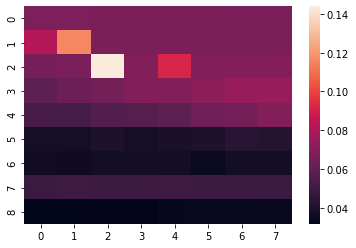

In [23]:
data_predicted, best_Order, best_Nc, best_alpha = HFCM_ridge(scaled, 0.9)

In [38]:
(best_Order, best_Nc, best_alpha)

(9, 10, 0.1)

In [39]:
stop = time.time()
print((stop-start)/60)

61.55256001551946


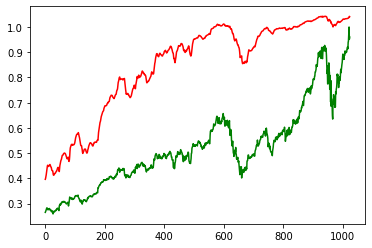

In [40]:
plt.plot(data_predicted[len_train_data:], color='r')
plt.plot(scaled[len_train_data:], color='g')

In [41]:
mse, Test_rmse, nmse = statistics(scaled[len_train_data:], data_predicted[len_train_data:])
print('Forecasting on entire dataset: MSE|RMSE|NMSE is : |%f |%f |%f|' % (np.power(Test_rmse, 2), Test_rmse, nmse))

Forecasting on entire dataset: MSE|RMSE|NMSE is : |0.118267 |0.343899 |0.000806|
